# Daylight to sunset ocean view

First, import all the required libraries.

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
from WE import *

def im2mat(img):
    """Converts an image to matrix (one pixel per line)"""
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)

def minmax(img):
    return np.clip(img, 0, 1)

## Read data
Next, we read images to transform their colors.

shape of first image: (75, 75, 3)
shape of second image: (75, 75, 3)


Text(0.5, 1.0, 'Image 2')

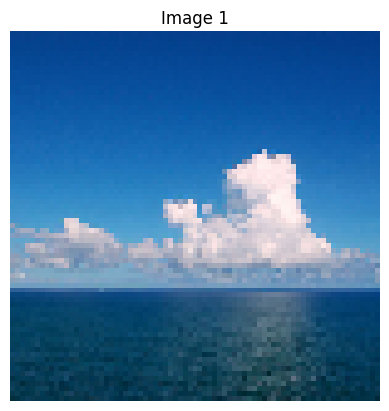

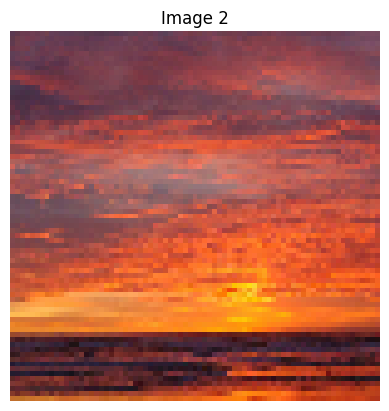

In [2]:
I1 = plt.imread('ocean_day.jpg').astype(np.float64)/256
I2 = plt.imread('ocean_sunset.jpg').astype(np.float64)/256

## look at lower resolution picture
## make sure images have the same dimension at the end
I1c = I1[:600,100:700][::8,::8]#[::13,::15,::]
X1c = im2mat(I1c)

I2c = I2[:600,100:700][::8,::8]#[::13,::15,::]
X2c = im2mat(I2c)

Xs = X1c
Xt = X2c
Xs.shape

day = im2mat(I1c)
sunset = im2mat(I2c)

print("shape of first image:", I1c.shape)
print("shape of second image:", I2c.shape)
plt.figure()
plt.imshow(I1c)
plt.axis('off')
plt.title('Image 1')

plt.figure()
plt.imshow(I2c)
plt.axis('off')
plt.title('Image 2')


## Find the optimal map using WE for a range of matching moments
Next, we using entropic optimal transport with constraint on moments to find the map between images.

In [33]:
id0s = [[1,0,0, 2,0,0,1,1,0] # WE(2)
        ,[1,0,0, 2,0,0,1,1,0, 3,0,0,2,2,1,0,1,0] # WE(3)
        ,[1,0,0, 2,0,0,1,1,0, 3,0,0,2,2,1,0,1,0, 4,0,0,3,3,1,0,1,0] # WE(4)
        ]
id1s = [[0,1,0, 0,2,0,1,0,1] # WE(2)
        ,[0,1,0, 0,2,0,1,0,1, 0,3,0,1,0,2,2,0,1] # WE(3)
        ,[0,1,0, 0,2,0,1,0,1, 0,3,0,1,0,2,2,0,1, 0,4,0,1,0,3,3,0,1]  # WE(4)
        ]
id2s = [[0,0,1, 0,0,2,0,1,1]  # WE(2)
        ,[0,0,1, 0,0,2,0,1,1, 0,0,3,0,1,0,1,2,2]  # WE(3)
        ,[0,0,1, 0,0,2,0,1,1, 0,0,3,0,1,0,1,2,2, 0,0,4,0,1,0,1,3,3]  # WE(4)
        ]

Xsn = Xs.copy()
Xtn = Xt.copy()
WE_X = []
WE_Y = []
for nids in range(len(id0s)):
  id0 = id0s[nids]
  id1 = id1s[nids]
  id2 = id2s[nids]
  we = WE(id0,id1,id2)
  X, Y, wdist = we.forward(Xsn, Xtn, id0, id1, id2, Nt=60, dt=1.e-7)
  WE_X.append(X)
  WE_Y.append(Y)
  print("nids=", nids+1)

nids= 1
nids= 2
nids= 3


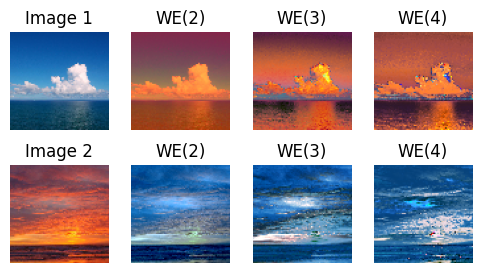

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(6, 3))

axes[0,0].imshow(I1c)
axes[0,0].axis('off')
axes[0,0].set_title('Image 1')

I1_WE = minmax(mat2im(WE_X[0].T, I1c.shape))
axes[0,1].imshow(I1_WE)
axes[0,1].axis('off')
axes[0,1].set_title('WE(2)')

I1_WE = minmax(mat2im(WE_X[1].T, I1c.shape))
axes[0,2].imshow(I1_WE)
axes[0,2].axis('off')
axes[0,2].set_title('WE(3)')

I1_WE = minmax(mat2im(WE_X[2].T, I1c.shape))
axes[0,3].imshow(I1_WE)
axes[0,3].axis('off')
axes[0,3].set_title('WE(4)')

axes[1,0].imshow(I2c)
axes[1,0].axis('off')
axes[1,0].set_title('Image 2')

I2_WE = minmax(mat2im(WE_Y[0].T, I1c.shape))
axes[1,1].imshow(I2_WE)
axes[1,1].axis('off')
axes[1,1].set_title('WE(2)')

I2_WE = minmax(mat2im(WE_Y[1].T, I1c.shape))
axes[1,2].imshow(I2_WE)
axes[1,2].axis('off')
axes[1,2].set_title('WE(3)')

I2_WE = minmax(mat2im(WE_Y[2].T, I1c.shape))
axes[1,3].imshow(I2_WE)
axes[1,3].axis('off')
axes[1,3].set_title('WE(4)')

fig.subplots_adjust(hspace=0.35)

plt.savefig("coloring_ocean.pdf",format='pdf', bbox_inches="tight", dpi=300);